In [4]:
import cv2

from IPython.display import display, clear_output
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

from urllib.request import urlopen
def url_to_image(url, readFlag=cv2.IMREAD_COLOR):
    # download the image, convert it to a NumPy array, and then read
    # it into OpenCV format
    resp = urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, readFlag)

    # return the image
    return image



Text(0.5, 1.0, 'Baboon')

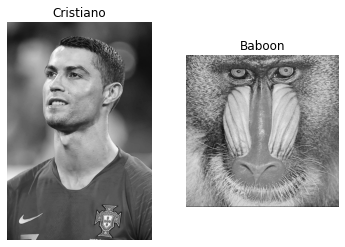

In [5]:
#read the images
cristiano = url_to_image('https://upload.wikimedia.org/wikipedia/commons/8/8c/Cristiano_Ronaldo_2018.jpg')
fig, ax = plt.subplots(1, 2)
clear_output()
ax[0].imshow(cv2.cvtColor(cristiano, cv2.COLOR_BGR2GRAY), cmap='gray')
ax[0].axis('off')
ax[0].set_title('Cristiano')

baboon = url_to_image('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png')
ax[1].imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2GRAY), cmap='gray')
ax[1].axis('off')
ax[1].set_title('Baboon')

(-0.5, 613.5, 920.5, -0.5)

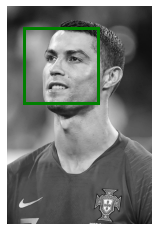

In [6]:
cascadePath = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascadePath)
##Convert frame to grayscale
gray_cristiano = cv2.cvtColor(cristiano, cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(
    gray_cristiano,
    scaleFactor=1.1,
    minNeighbors=6,
    minSize=(100, 100),
    flags=cv2.CASCADE_SCALE_IMAGE
)
# output of the classifier
faces
#visualize the outcome of the algorithm
from matplotlib.patches import Rectangle

fig, ax = plt.subplots()
ax.imshow(gray_cristiano, cmap='gray')

# iterate over all the detected faces
for face in faces:
    # retrieve the coordinates of the position of the current face, and its size
    (x_smile, y_smile, w_smile, h_smile) = face
    # draw a rectangle where the face is detected
    ax.add_artist(Rectangle((x_smile, y_smile), w_smile, h_smile, fill=False, lw=3, color='green'))

ax.axis('off')

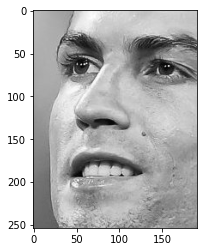

In [14]:

face = gray_cristiano[y_smile:y_smile + h_smile, x_smile:x_smile + w_smile]

# The cropping coefficient for determining the size of the face
c1 = 0.2

# calculate how to crop the face
# vertical dimension
v_cut = int(c1 * w_smile)
# horizontal dimension
h_cut = int(c1 * h_smile)

# select only the face portion from the smile test image
cut_face = gray_cristiano[y_smile + v_cut:y_smile + h_smile,
                 x_smile + h_cut:x_smile - h_cut + w_smile]


# Code Cell 12
fig, ax = plt.subplots()
ax.imshow(cut_face, cmap='gray')


<h2>Baboon face detection <h2>

In [19]:
def detect_faces(cascade, test_image, scaleFactor = 1.1):
    # create a copy of the image to prevent any changes to the original one.
    image_copy = test_image.copy()

    #convert the test image to gray scale as opencv face detector expects gray images
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)

    # Applying the haar classifier to detect faces
    faces_rect = cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors=5)

    for (x, y, w, h) in faces_rect:
        cv2.rectangle(image_copy, (x, y), (x+w, y+h), (0, 255, 0), 15)

    return image_copy


def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


In [20]:

gray_baboon = cv2.cvtColor(baboon, cv2.COLOR_BGR2GRAY)
faces = detect_faces(faceCascade,gray_baboon)
plt.imshow(convertToRGB(faces))

error: OpenCV(4.6.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::(anonymous namespace)::CvtHelper<cv::impl::(anonymous namespace)::Set<3, 4, -1>, cv::impl::(anonymous namespace)::Set<1, -1, -1>, cv::impl::(anonymous namespace)::Set<0, 2, 5>, cv::impl::(anonymous namespace)::NONE>::CvtHelper(cv::InputArray, cv::OutputArray, int) [VScn = cv::impl::(anonymous namespace)::Set<3, 4, -1>, VDcn = cv::impl::(anonymous namespace)::Set<1, -1, -1>, VDepth = cv::impl::(anonymous namespace)::Set<0, 2, 5>, sizePolicy = cv::impl::(anonymous namespace)::NONE]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1
